In [ ]:
# Instalación de librerias
!pip install mediapipe opencv-python

In [ ]:
# Importamos paquetes necesarios
import cv2
import mediapipe as mp
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt


Saving rostro_harry.jpg to rostro_harry (2).jpg
Se subió el archivo "rostro_harry (2).jpg" con un tamaño de 118460 bytes


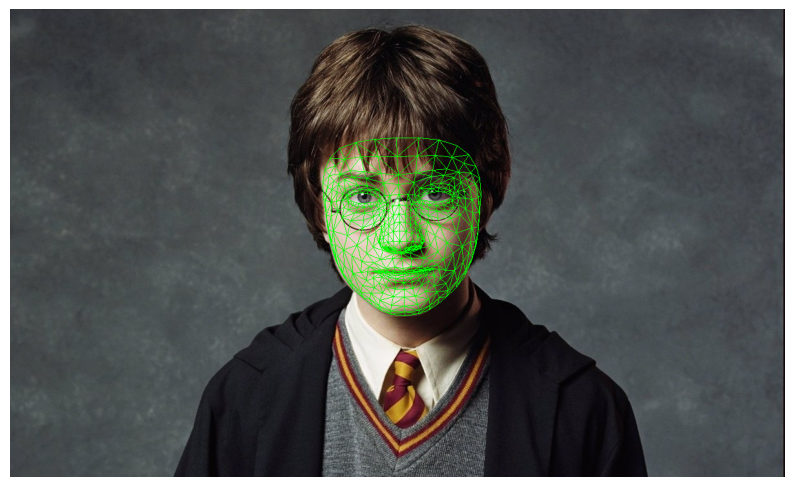

In [5]:

# Funcion para subir imagen
def upload_image():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('Se subió el archivo "{name}" con un tamaño de {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    return fn

# Subida de Imagen
nombre_archivo = upload_image()

# Lectura con cv2
imagen = cv2.imread(nombre_archivo)

# Conversion de imagen a RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Inicializacion de MediaPipe
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Procesamiento de imagen y deteccion de rostros
resultado = face_mesh.process(imagen_rgb)

# Dibujo de landmark faciales en la imagen
if resultado.multi_face_landmarks:
  for face_landmarks in resultado.multi_face_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        image=imagen,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))

# Ploteo de imagen con malla facial identificados
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()